Demo code for low pass, high pass, and bandpass filters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal

plt.style.use('ggplot')
plt.style.use('default')

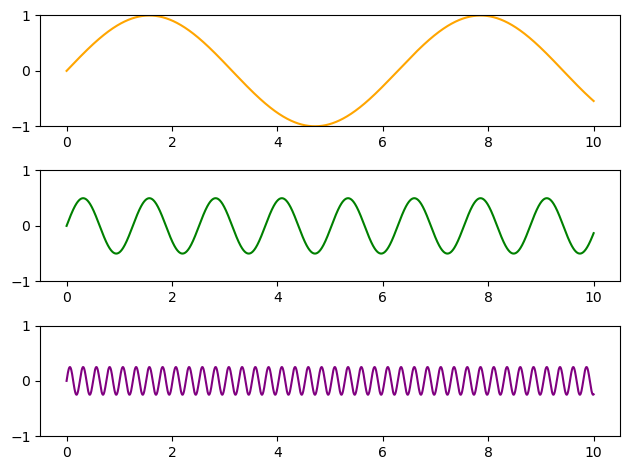

In [2]:

t = np.linspace(0,10, 2001)
ws = [1, 5, 25]
As = [1, .5, .25]
colors = ['orange', 'green', 'purple']

fig, ax = plt.subplots(3,1)
for i, w in enumerate(ws):
    ax[i].plot(t, As[i]*np.sin(w*t), c = colors[i])
    ax[i].set_ylim([-1, 1])
    #ax[i].set_axis_off()   
fig.tight_layout()

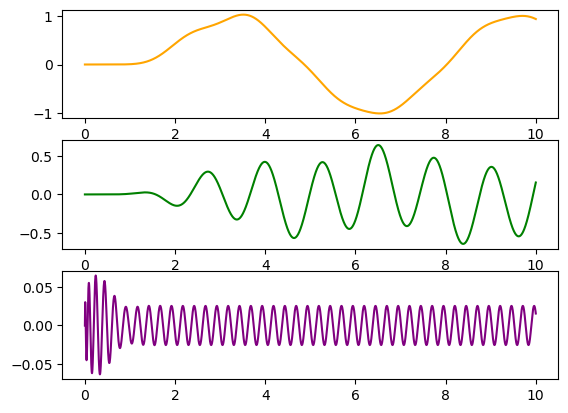

In [3]:

fs = 2000
tend = 10
t = np.linspace(0,tend, tend*fs+1)
y = np.sin(t) + .5*np.sin(5*t) + .25*np.sin(25*t)
colors = ['orange', 'green', 'purple']

filters = [None] * 3
filters[0] = signal.butter(10, .6, 'lowpass', fs=fs, output='sos')
filters[1] = signal.butter(10, [.2, .9], 'bandpass', fs=fs, output='sos')
filters[2] = signal.butter(10, 5, 'highpass', fs=fs, output='sos')

y_filtered = [signal.sosfilt(f, y) for f in filters]

fig, ax = plt.subplots(3, 1)
for i, y in enumerate(y_filtered):
    ax[i].plot(t, y, c = colors[i])